In [1]:
import pandas as pd
import numpy as np
import random
from collections import Counter 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import ShuffleSplit, KFold, StratifiedKFold, StratifiedShuffleSplit, GroupKFold, GroupShuffleSplit
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
%matplotlib inline

In [2]:
x_test = pd.read_csv('../input/departure-delay/x_test.csv')
x = pd.read_csv('../input/departure-delay/x_train.csv')
y = pd.read_csv('../input/departure-delay/y_train.csv')

In [3]:
x['CancellationCode'].unique()

array(['N', 'B', 'A', 'C'], dtype=object)

In [4]:
x.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6228008,2008,11,21,5,1500.0,1443,1557.0,1534,EV,...,7.0,16.0,0,N,0,17.0,0.0,6.0,0.0,0.0
1,4732721,2008,8,16,6,2000.0,1925,2149.0,2105,AA,...,7.0,14.0,0,N,0,31.0,0.0,9.0,0.0,4.0
2,472452,2008,1,26,6,1953.0,1900,2103.0,2020,9E,...,15.0,14.0,0,N,0,0.0,0.0,0.0,0.0,43.0
3,5300680,2008,9,15,1,1233.0,1215,1355.0,1350,AA,...,10.0,7.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2364574,2008,4,13,7,1325.0,540,1604.0,752,CO,...,10.0,27.0,0,N,0,465.0,0.0,27.0,0.0,0.0


In [5]:
x['CancellationCode'].value_counts()

N    1355300
B        204
A        173
C         53
Name: CancellationCode, dtype: int64

In [6]:
y.head()

,DepDelay
0,17.0
1,35.0
2,53.0
3,18.0
4,465.0


In [7]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355730 entries, 0 to 1355729
Data columns (total 1 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   DepDelay  1355730 non-null  float64
dtypes: float64(1)
memory usage: 10.3 MB


In [8]:
x_test.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,6544326,2008,12,28,7,1658.0,1645,1721.0,1720,WN,...,3.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,14847,2008,1,7,1,1933.0,1855,2032.0,2005,WN,...,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,27.0
2,3624477,2008,7,9,3,1131.0,1120,1220.0,1210,WN,...,3.0,14.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,456890,2008,1,15,2,1241.0,1208,1323.0,1300,9E,...,5.0,24.0,0,N,0,0.0,0.0,0.0,0.0,23.0
4,2861412,2008,5,22,4,1037.0,1000,1130.0,1105,9E,...,6.0,16.0,0,N,0,25.0,0.0,0.0,0.0,0.0


In [9]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1355730 entries, 0 to 1355729
Data columns (total 29 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1355730 non-null  int64  
 1   Year               1355730 non-null  int64  
 2   Month              1355730 non-null  int64  
 3   DayofMonth         1355730 non-null  int64  
 4   DayOfWeek          1355730 non-null  int64  
 5   DepTime            1355730 non-null  float64
 6   CRSDepTime         1355730 non-null  int64  
 7   ArrTime            1350732 non-null  float64
 8   CRSArrTime         1355730 non-null  int64  
 9   UniqueCarrier      1355730 non-null  object 
 10  FlightNum          1355730 non-null  int64  
 11  TailNum            1355727 non-null  object 
 12  ActualElapsedTime  1349848 non-null  float64
 13  CRSElapsedTime     1355584 non-null  float64
 14  AirTime            1349848 non-null  float64
 15  ArrDelay           1349848 non-n

In [10]:
# creating new variables and renaming 
# x['DepDate'] = pd.to_datetime(x['Year']*10000+x['Month']*100+x['DayofMonth'],format='%Y%m%d')
x_test_date = x_test['Year']*10000+x_test['Month']*100+x_test['DayofMonth']
x_date = x['Year']*10000+x['Month']*100+x['DayofMonth']
x_test.insert(0, 'DepDate', x_test_date)
x.insert(0, 'DepDate', x_date)
#Status represents wether the flight was on time (0), slightly delayed (1), highly delayed (2), diverted (3), or cancelled (4)
x.loc[x['ArrDelay'] <= 15, 'Status'] = 0
x.loc[x['ArrDelay'] >= 15, 'Status'] = 1
x.loc[x['ArrDelay'] >= 60, 'Status'] = 2
x.loc[x['Diverted'] == 1, 'Status'] = 3
x.loc[x['Cancelled'] == 1, 'Status'] = 4
x_test.loc[x_test['ArrDelay'] <= 15, 'Status'] = 0
x_test.loc[x_test['ArrDelay'] >= 15, 'Status'] = 1
x_test.loc[x_test['ArrDelay'] >= 60, 'Status'] = 2
x_test.loc[x_test['Diverted'] == 1, 'Status'] = 3
x_test.loc[x_test['Cancelled'] == 1, 'Status'] = 4   
    
#Cancellation cause
x.loc[x['CancellationCode'] =="A", 'CancellationCode'] = 1
x.loc[x['CancellationCode'] =="B", 'CancellationCode'] = 1
x.loc[x['CancellationCode'] =="C", 'CancellationCode'] = 1
x.loc[x['CancellationCode'] =="N", 'CancellationCode'] = 0
x_test.loc[x_test['CancellationCode'] =="A", 'CancellationCode'] = 1
x_test.loc[x_test['CancellationCode'] =="B", 'CancellationCode'] = 1
x_test.loc[x_test['CancellationCode'] =="C", 'CancellationCode'] = 1
x_test.loc[x_test['CancellationCode'] =="N", 'CancellationCode'] = 0

# dropping the unwanted data
drop_list = ['Year', 'Month', 'DayofMonth', 'FlightNum', 'TailNum']
x = x.drop(drop_list, axis=1)
x_test = x_test.drop(drop_list, axis=1)

x = x.apply(lambda x: x.fillna(x.value_counts().index[0]))
x_test = x_test.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [11]:
def Fail(X):
    fail = X.apply(lambda x: x['ArrTime']*x['CarrierDelay'] + (x['DepTime'] - x['CRSDepTime'])**2, axis=1)
#     X = X.drop(['failures', 'studytime'], axis=1)
    X.insert(5, 'Fail', fail)
    return X

In [12]:
xy = x.copy()
xy.insert(xy.shape[1], 'DepDelay', y)

In [13]:
orig_names = xy['Origin'].unique()
orig_av_delay = np.zeros_like(orig_names)

for i in range(len(orig_names)):
    orig_av_delay[i] = np.mean(xy.loc[xy['Origin'] == orig_names[i]]['DepDelay'])
    
orig = list(zip(list(orig_names), list(orig_av_delay)))

In [14]:
dest_names = xy['Dest'].unique()
dest_av_delay = np.zeros_like(dest_names)

for i in range(len(dest_names)):
    dest_av_delay[i] = np.mean(xy.loc[xy['Dest'] == dest_names[i]]['DepDelay'])
    
dest = list(zip(list(dest_names), list(dest_av_delay)))

In [15]:
orig_sorted = dict(sorted(orig, key=lambda x: x[1]))
dest_sorted = dict(sorted(dest, key=lambda x: x[1]))

In [16]:
x_test.tail()

,DepDate,Unnamed: 0,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
581023,20080703,4165309,4,1957.0,1830,2320.0,2153,B6,203.0,203.0,...,53.0,0,0,0,20.0,0.0,0.0,0.0,67.0,2.0
581024,20080620,3300943,5,2156.0,2130,20.0,2359,DL,144.0,149.0,...,26.0,0,0,0,17.0,0.0,0.0,0.0,4.0,1.0
581025,20080207,980243,4,1355.0,1340,1505.0,1450,MQ,70.0,70.0,...,13.0,0,0,0,2.0,0.0,0.0,0.0,13.0,1.0
581026,20080714,3774505,1,1810.0,1620,2107.0,1918,OH,117.0,118.0,...,18.0,0,0,0,109.0,0.0,0.0,0.0,0.0,2.0
581027,20080615,3406567,7,1157.0,1110,1423.0,1345,MQ,86.0,95.0,...,12.0,0,0,0,0.0,2.0,0.0,0.0,36.0,1.0


In [17]:
OriginDelay = np.zeros(xy.shape[0])
DestDelay = np.zeros(xy.shape[0])

for i in range(xy.shape[0]):
    OriginDelay[i] = orig_sorted[xy['Origin'][i]]
    DestDelay[i] = dest_sorted[xy['Dest'][i]]

xy.insert(3, 'OriginDelay', OriginDelay)
xy.insert(3, 'DestDelay', DestDelay)

xy = xy.drop('Origin', axis=1)
xy = xy.drop('Dest', axis=1)

In [18]:
OriginDelay = np.zeros(x_test.shape[0])
DestDelay = np.zeros(x_test.shape[0])

for i in range(x_test.shape[0]):
    if x_test['Origin'][i] in orig_sorted:
        OriginDelay[i] = orig_sorted[x_test['Origin'][i]]
    else:
        OriginDelay[i] = np.mean(orig_av_delay)
    if x_test['Dest'][i] in dest_sorted:    
        DestDelay[i] = dest_sorted[x_test['Dest'][i]]
    else:
        DestDelay[i] = np.mean(dest_av_delay)    

x_test.insert(3, 'OriginDelay', OriginDelay)
x_test.insert(3, 'DestDelay', DestDelay)

x_test = x_test.drop('Origin', axis=1)
x_test = x_test.drop('Dest', axis=1)

In [19]:
xy.head()

,DepDate,Unnamed: 0,DayOfWeek,DestDelay,OriginDelay,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status,DepDelay
0,20081121,6228008,5,46.906985,40.885272,1500.0,1443,1557.0,1534,EV,...,0,0,0,17.0,0.0,6.0,0.0,0.0,1.0,17.0
1,20080816,4732721,6,38.411543,45.978500,2000.0,1925,2149.0,2105,AA,...,0,0,0,31.0,0.0,9.0,0.0,4.0,1.0,35.0
2,20080126,472452,6,46.546327,57.976845,1953.0,1900,2103.0,2020,9E,...,0,0,0,0.0,0.0,0.0,0.0,43.0,1.0,53.0
3,20080915,5300680,1,44.194874,40.759126,1233.0,1215,1355.0,1350,AA,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
4,20080413,2364574,7,44.710758,39.134356,1325.0,540,1604.0,752,CO,...,0,0,0,465.0,0.0,27.0,0.0,0.0,2.0,465.0


In [20]:
xy = Fail(xy)
x_test = Fail(x_test)

In [21]:
xy.corr()

,DepDate,Unnamed: 0,DayOfWeek,DestDelay,OriginDelay,Fail,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status,DepDelay
DepDate,1.000000,0.995750,0.000549,0.003814,-0.000441,-0.005237,-0.007010,-0.010295,0.001501,0.002539,...,0.028413,0.028413,0.006009,-0.004760,0.003747,0.004226,-0.002283,-0.002227,-0.007688,0.004301
Unnamed: 0,0.995750,1.000000,-0.000069,0.026080,0.011994,-0.002435,-0.008600,-0.011199,0.000407,0.003472,...,0.027802,0.027802,0.006231,-0.001472,0.003160,0.009729,-0.002789,-0.004024,-0.004029,0.006224
DayOfWeek,0.000549,-0.000069,1.000000,-0.017296,-0.012983,0.012376,0.021461,0.026584,0.010064,0.016904,...,0.000093,0.000093,-0.001714,0.006810,0.004419,-0.006478,0.003757,0.005288,-0.000084,0.008230
DestDelay,0.003814,0.026080,-0.017296,1.000000,0.312080,0.027382,-0.041016,-0.060886,-0.008151,-0.029640,...,0.003894,0.003894,0.010840,0.005982,0.020803,0.261484,-0.007238,0.009188,0.138266,0.129907
OriginDelay,-0.000441,0.011994,-0.012983,0.312080,1.000000,-0.008338,-0.014226,-0.048747,-0.020748,-0.033952,...,0.002830,0.002830,0.004717,0.044602,0.041611,0.119111,-0.004869,0.064010,0.133808,0.121758
Fail,-0.005237,-0.002435,0.012376,0.027382,-0.008338,1.000000,-0.263760,0.146084,-0.177403,-0.081053,...,0.002684,0.002684,-0.000856,0.231530,0.054299,0.014945,-0.001262,0.163358,0.151466,0.296549
DepTime,-0.007010,-0.008600,0.021461,-0.041016,-0.014226,-0.263760,1.000000,0.882046,0.457626,0.711674,...,0.002158,0.002158,-0.005138,-0.010037,0.017321,0.048447,-0.009592,0.168818,0.152911,0.138723
CRSDepTime,-0.010295,-0.011199,0.026584,-0.060886,-0.048747,0.146084,0.882046,1.000000,0.395462,0.710755,...,-0.000021,-0.000021,-0.009460,-0.067097,-0.001316,-0.008354,-0.012389,0.147243,0.071830,0.057896
ArrTime,0.001501,0.000407,0.010064,-0.008151,-0.020748,-0.177403,0.457626,0.395462,1.000000,0.617916,...,0.015869,0.015869,0.044758,-0.065684,-0.024264,0.029622,-0.006177,-0.026472,0.005950,-0.050676
CRSArrTime,0.002539,0.003472,0.016904,-0.029640,-0.033952,-0.081053,0.711674,0.710755,0.617916,1.000000,...,0.000045,0.000045,0.001120,-0.061296,0.000416,0.020852,-0.009597,0.116210,0.065074,0.053017


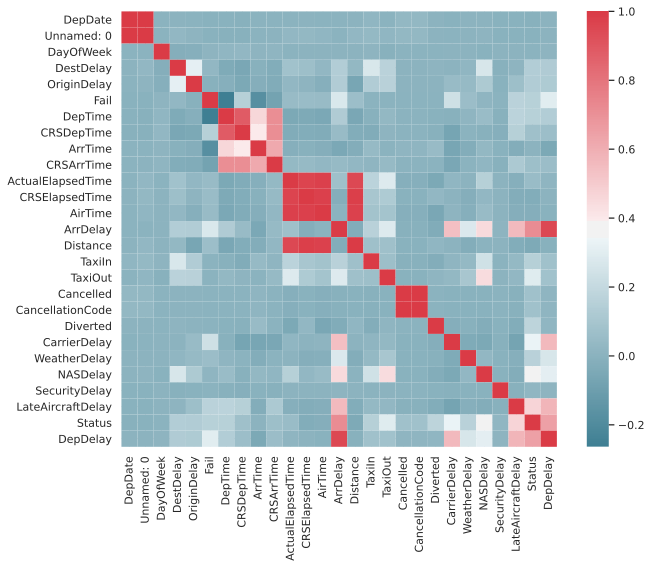

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = xy.corr()
sns.heatmap(corr, square=True, ax=ax, cmap=sns.diverging_palette(220, 10, as_cmap=True))

plt.grid(True,linewidth=0.5)
plt.tight_layout()
plt.show()

In [23]:
xy_cor = xy.copy()
x_test_cor = x_test.copy()

In [24]:
# corr_param = []
# i = 0
# for feature in corr.columns:
#     for j in range(i + 1, corr.shape[1] - 1, 1):
#         if (abs(corr[feature][j]) > 0.6) and (feature not in corr_param):
#              corr_param.append(feature)

#     i += 1
            
# print(corr_param)

In [25]:
# corr_param.pop(-2)
# aditional = ['TailNum', 'Origin', 'Dest', 'CancellationCode']
# for elem in aditional:
#     corr_param.append(elem)
# print(corr_param)

In [26]:
# xy_cor = xy_cor.drop(corr_param, axis=1)
# x_test_cor = x_test_cor.drop(corr_param, axis=1)

In [27]:
# is_test = xy_cor.apply(lambda x: 0, axis=1)
# train = pd.get_dummies(xy_cor[xy_cor.columns[:-1]])
# train.insert(train.shape[1], 'is_test', is_test)

# is_test = x_test_cor.apply(lambda x: 1, axis=1)
# test = pd.get_dummies(x_test_cor)
# test.insert(test.shape[1], 'is_test', is_test)

In [28]:
# data = pd.concat([train, test])
# data = data.reset_index(drop=True)

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['is_test'], test_size=0.2, random_state=42)
# data.head(10)

In [29]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# clf = SVC(gamma=2, C=1)
# clf.fit(X_train,y_train)
# print(accuracy_score(clf.predict(X_test), y_test))

In [30]:
X = pd.get_dummies(xy_cor[xy_cor.columns[:-1]])
y = xy_cor[xy_cor.columns[-1]]
Xy = X.copy()
Xy.insert(Xy.shape[1], 'DepDelay', y)

In [31]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold  
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [32]:
# kf = KFold(n_splits=10, random_state=34, shuffle=True)
# # X, y = make_regression(random_state=34)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=34)
# gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.08, max_depth=2, random_state=34, loss='ls')
# gbr.fit(X_train,y_train)
# cross_val_scores = cross_val_score(gbr, X_train, y_train, cv=kf)
# print('Mean:', mean_squared_error(gbr.predict(X_test), y_test))

In [33]:
# parameters = {
#     'n_estimators' : [200],
# #     'learning_rate' : [0.1],
#     'learning_rate' : [0.11, 0.12, 0.13, 0.14],
#     'max_depth' : [4]
# }
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)
# gbr = GradientBoostingRegressor(n_estimators=400, learning_rate=0.2, max_depth=10, random_state=40, loss='ls')
# gbr.fit(X_train,y_train)

# gs_cv = GridSearchCV(gbr, parameters).fit(X_train, y_train)
# gs_cv.best_params_

In [34]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=1, learning_rate=0.02,
n_estimators=5000, max_depth=10, alpha=10, subsample=0.8)
xgb_model.fit(X, y)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=10, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
y_pred = xgb_model.predict(X)
rmse = mean_squared_error(y, y_pred, squared=False)
rmse

0.416217893512486

In [36]:
# X = D1(X)
# X = D2(X)

In [37]:
# cv = ShuffleSplit()

In [38]:
# neighbours = KNeighborsRegressor(n_neighbors=5)
# neighbours.fit(X, y)
# R2_knn = np.mean(cross_val_score(neighbours, X, y, cv=cv))

In [39]:
# regression = LinearRegression()
# regression.fit(X, y)
# R2_lr = np.mean(cross_val_score(regression, X, y, cv=cv))

In [40]:
# tree = DecisionTreeRegressor()
# tree.fit(X, y)
# R2_tree = np.mean(cross_val_score(tree, X, y, cv=cv))

In [41]:
# # print("R2 knn: ", R2_knn)
# print("R2 reg: ", R2_lr)
# # print("R2 tre: ", R2_tree)

In [42]:
# np.mean(cross_val_score(gbr, X_train, y_train, cv=cv))

In [43]:
X = pd.get_dummies(x_test_cor)
prediction = xgb_model.predict(X)

In [44]:
prediction

array([ 12.980718,  38.197403,  10.99254 , ...,  15.22521 , 111.033646,
        47.914764], dtype=float32)

In [45]:
pd.Series(prediction, name='DelayTime').to_csv('prediction.csv', 
                                           index_label='id', header=True)